In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding,LSTM,Dense,GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [2]:
#loading the intents.json for training the chatbot
with open('intents.json','r') as json_file:
    intents=json.load(json_file)

In [3]:
#saperating into tags, inputs and responses
tags = []
inputs = []
responses={}
for intent in intents['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [4]:
#Converting the isolated datas entered into dataframe
data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})

In [5]:
data

,inputs,tags
0,Hi there,greeting
1,How are you,greeting
2,Is anyone there?,greeting
3,Hey,greeting
4,Hello,greeting
...,...,...
104,Ask me a question,riddle
105,Riddle,riddle
106,how old are you,age
107,when were you made,age


In [6]:
#to train a deep learning model in NLP we prepricess it (stemming,removing punctuations and tokenization)


In [7]:
#removing punctuations and converting into lowercase
import string
data['inputs'] = data['inputs'].apply(lambda wrds:[word.lower() for word in wrds if word not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrds: ''.join(wrds))

In [8]:
data

,inputs,tags
0,hi there,greeting
1,how are you,greeting
2,is anyone there,greeting
3,hey,greeting
4,hello,greeting
...,...,...
104,ask me a question,riddle
105,riddle,riddle
106,how old are you,age
107,when were you made,age


In [9]:
#to tokenize data
import sklearn
tokenizer=Tokenizer(num_words=2000) #Total words in vocabulary= 2000
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
#apply padding to make dataset uniform in dimension 
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#encoding the outputs(tags)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])
data['tags']
print(type(y_train))
print(x_train)
print(y_train)

<class 'numpy.ndarray'>
[[  0   0   0   0  46  23]
 [  0   0   0   7   2   1]
 [  0   0   0   3  47  23]
 [  0   0   0   0   0  48]
 [  0   0   0   0   0  49]
 [  0   0   0   0   8  12]
 [  0   0   0   0   0  50]
 [  0   0   0   0   0  51]
 [  0   0   0  52   1  53]
 [  0   0   0   0   0  54]
 [  0   0   0   0  55  56]
 [  0   0   0  57  58  13]
 [  0   0   0   0   0  59]
 [  0   0   0   0   0  14]
 [  0   0   0   0  60   1]
 [  0   0   0   0  24  25]
 [  0   0   0   0  15  14]
 [  0   0  14  61  62   6]
 [  0   7   1  63  26   6]
 [  0   0   4   1  27  64]
 [  0   0   4  26   1  65]
 [  0   7   1  27  66  25]
 [  0   0   4  67   3  68]
 [  0   0  16   6  17  28]
 [  0   0   0   0   0  28]
 [  0   0   0  69   6  70]
 [  0   0   0   5   2   1]
 [  0   0   0   4   2   1]
 [  0   0   4   3  10  13]
 [  0   0   4   3  10  18]
 [  0   0   0   0   0  18]
 [  0   0   0   0   0  13]
 [  0   0  16   6  10  18]
 [  0   0   0   0   0  12]
 [  0   4  12   3   3  71]
 [  0   0   0   0  72  29]
 [  

In [10]:
#To know the input shape of the array
input_shape = x_train.shape[1]
input_shape

6

In [11]:
# encoding output data
vocab=len(tokenizer.word_index)
print("total words in vocabulary is ",vocab)
op_len=len(list(set(tags)))
print("output length: ",op_len)

total words in vocabulary is  123
output length:  28


In [12]:
# creating the model
i = Input(shape=(input_shape,))
x = Embedding(vocab+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(op_len,activation="softmax")(x)
model  = Model(i,x)

In [13]:
#compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [14]:
#training the model
train = model.fit(x_train,y_train,epochs=600)

Epoch 1/600
4/4 [==============================] - 6s 7ms/step - loss: 3.3340 - accuracy: 0.0092 
Epoch 2/600
4/4 [==============================] - 0s 6ms/step - loss: 3.3312 - accuracy: 0.0459
Epoch 3/600
4/4 [==============================] - 0s 8ms/step - loss: 3.3292 - accuracy: 0.0734
Epoch 4/600
4/4 [==============================] - 0s 8ms/step - loss: 3.3271 - accuracy: 0.0826
Epoch 5/600
4/4 [==============================] - 0s 8ms/step - loss: 3.3250 - accuracy: 0.0826
Epoch 6/600
4/4 [==============================] - 0s 8ms/step - loss: 3.3229 - accuracy: 0.0917
Epoch 7/600
4/4 [==============================] - 0s 8ms/step - loss: 3.3206 - accuracy: 0.1009
Epoch 8/600
4/4 [==============================] - 0s 7ms/step - loss: 3.3182 - accuracy: 0.1101
Epoch 9/600
4/4 [==============================] - 0s 7ms/step - loss: 3.3153 - accuracy: 0.1284
Epoch 10/600
4/4 [==============================] - 0s 7ms/step - loss: 3.3119 - accuracy: 0.1284
Epoch 11/600
4/4 [==========

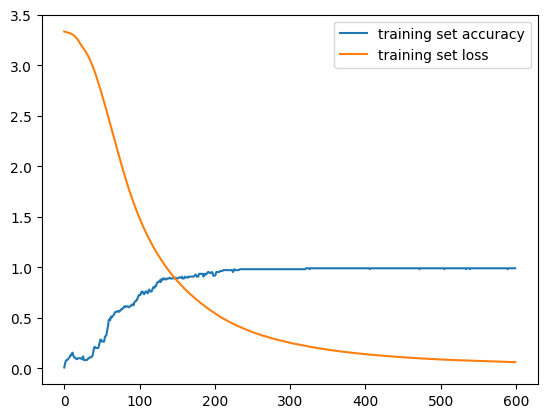

In [15]:
#plotting model accuracy
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [19]:
#chatting
import random


while True:
  texts_p = []
  prediction_input = input('You : ')

  #removing punctuation and converting to lowercase
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  #tokenizing and padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  #getting output from model
  output = model.predict(prediction_input)
  output = output.argmax()

  #finding the right tag and predicting
  response_tag = le.inverse_transform([output])[0]
  print("Adam : ",random.choice(responses[response_tag]))
  if response_tag == "goodbye":
    break

You :  hi


Adam :  Good to see you again


You :  who are you


Adam :  I am Adam, a Deep-Learning chatbot


You :  Who made you?


Adam :  I was made by Kashyap Ghimire, a computer engineering student studying in Kantipur Engineering College.


You :  How old are you


Adam :  I was made in September 2023, if that's what you are asking!


You :  tell me a joke


Adam :  As I get older and I remember all the people Iâ€™ve lost along the way, I think to myself, maybe a career as a tour guide wasnâ€™t for me.


You :  lol


Adam :  Glad I could make you laugh !


You :  tell me a riddlew


Adam :  Head over to his any of his social profiles to find out! Linkedin: www.linkedin.com/in/kashyap-ghimire Github: https://github.com/kashyap2058 Instagram: @kashyap.ghimire.9


You :  tell me a riddle


Adam :   How can a girl go 25 days without sleep?.....She sleeps and night!


You :  Fuck you


Adam :  Well that hurts :(


You :  what are you upto?


Adam :  Talking to you, of course!


You :  contact developer


Adam :  You can contact my creator at his Linkedin profile : www.linkedin.com/in/kashyap-ghimire


You :  it was nice talking to you


Adam :  It was nice talking to you as well! Come back soon!


You :  sure


Adam :  Yeah!


You :  bye


Adam :  Do visit us again. Have a nice day.
